In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

plt.rcParams["figure.figsize"]=(12,8)

import warnings
warnings.filterwarnings("ignore")

# Basic Job Description about the DataSet



In [4]:
#Reading the CSV dataset file
job = pd.read_csv("fake_job_postings.csv")
job.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
#looking at the overall information about the Dataset
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
#Looking at how many null values are within each column in percentage
job.isnull().sum()/len(job)*100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

## There are too many null spaces within the dataset. In order to compare the datasets among the rows and columns, it is highly necessary to either fill up the space with an empty string or drop some unnecessary columns (data clean-up process) that contains too much null values (ex. salary_range)

In [9]:
#Filling out all the empty space with NA values
job.fillna('NA', inplace = True)

# Data Clean-Up: US Real/Fake Job Posting

In [11]:
#Process of cleaning up the data and having only US locations remain.

job['Location'] = 0 #set up a new column/array 
for i in job:
  job['Location'] = job.location.str.extract('([A-Z]+)') 
#using for loop, extract location values and append it in new "Location" column 

In [12]:
# find values that contain string of "US" and append it in an empty array of ls
ls = []
for i in range(len(job["Location"])):
  if job["Location"][i] == "US":
    ls.append(i)

In [14]:
#lock the values from the original dataset with restrictions mentioned above to only visualize US countries
job_us = job.loc[ls]
job.loc[ls].head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Location
0,1,Marketing Intern,"US, NY, New York",Marketing,NA,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NA,0,1,0,Other,Internship,NA,NA,Marketing,0,US
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NA,NA,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NA,0,1,0,NA,NA,NA,NA,NA,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NA,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NA,NA,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
5,6,Accounting Clerk,"US, MD,",NA,NA,NA,Job OverviewApex is an environmental consultin...,NA,NA,0,0,0,NA,NA,NA,NA,NA,0,US


# Data Clean-Up: Replacing Object Values with Numeric Values

In [15]:
#Listing out the types of "required education" listed above
job_us["required_education"].unique()

array(['NA', "Bachelor's Degree", 'High School or equivalent',
       'Unspecified', "Master's Degree",
       'Some College Coursework Completed', 'Certification',
       'Associate Degree', 'Doctorate', 'Professional',
       'Some High School Coursework', 'Vocational - Degree', 'Vocational',
       'Vocational - HS Diploma'], dtype=object)

In [16]:
#Listing out the types of "required experience" listed above
job_us["required_experience"].unique()

array(['Internship', 'NA', 'Mid-Senior level', 'Associate', 'Entry level',
       'Not Applicable', 'Executive', 'Director'], dtype=object)

In [17]:
#Listing out the types of "employment type" listed above
job_us["employment_type"].unique()

array(['Other', 'NA', 'Full-time', 'Part-time', 'Contract', 'Temporary'],
      dtype=object)

In [18]:
#Listing out the types of "function" listed above
job_us["function"].unique()

array(['Marketing', 'NA', 'Sales', 'Health Care Provider',
       'Customer Service', 'Information Technology', 'Other',
       'Engineering', 'Administrative', 'Production', 'Design',
       'Education', 'Supply Chain', 'Business Development',
       'Financial Analyst', 'Human Resources', 'Project Management',
       'Management', 'Manufacturing', 'Strategy/Planning',
       'General Business', 'Product Management', 'Research',
       'Accounting/Auditing', 'Quality Assurance', 'Consulting',
       'Business Analyst', 'Finance', 'Writing/Editing', 'Advertising',
       'Art/Creative', 'Public Relations', 'Data Analyst', 'Science',
       'Training', 'Distribution', 'Purchasing', 'Legal'], dtype=object)

In [19]:
#replacing and cleaning all the values in the "employment_type" into numeric values

job_us['employment_type'] = job_us['employment_type'].replace(['Full-time'], 0) #Full-time = 0
job_us['employment_type'] = job_us['employment_type'].replace(['Part-time'], 1) #Part-time = 1
job_us['employment_type'] = job_us['employment_type'].replace(['Contract'], 2) #Contract = 2
job_us['employment_type'] = job_us['employment_type'].replace(['Temporary'], 3) #Temporary = 3
job_us['employment_type'] = job_us['employment_type'].replace(['Other','NA'],4) #Other + NA = 4

job_us.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Location
0,1,Marketing Intern,"US, NY, New York",Marketing,NA,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NA,0,1,0,4,Internship,NA,NA,Marketing,0,US
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NA,NA,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NA,0,1,0,4,NA,NA,NA,NA,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NA,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,0,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NA,NA,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,0,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US
5,6,Accounting Clerk,"US, MD,",NA,NA,NA,Job OverviewApex is an environmental consultin...,NA,NA,0,0,0,4,NA,NA,NA,NA,0,US


In [20]:
#replacing and cleaning all the values in "required_education" into numeric values divided in accordance to DEGREE

#Different types of "required education" has been newly allocated into whether a candidate has a degree or not
Degree = ['Bachelor\'s Degree', 'Master\'s Degree', 'Associate Degree', 'Doctorate', 'Professional', 'Vocational - Degree']
Non_Degree = ['NA', 'High School or equivalent', 'Unspecified', 'Some College Coursework Completed', 'Certification', 'Some High School Coursework', "Vocational", 'Vocational - HS Diploma']

job_us['required_education'] = job_us["required_education"].replace(Degree, 1) #Degree = 1
job_us['required_education'] = job_us["required_education"].replace(Non_Degree, 0) #Non_Degree = 0
job_us.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Location
0,1,Marketing Intern,"US, NY, New York",Marketing,NA,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NA,0,1,0,4,Internship,0,NA,Marketing,0,US
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NA,NA,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NA,0,1,0,4,NA,0,NA,NA,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NA,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,0,Mid-Senior level,1,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NA,NA,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,0,Mid-Senior level,1,Hospital & Health Care,Health Care Provider,0,US
5,6,Accounting Clerk,"US, MD,",NA,NA,NA,Job OverviewApex is an environmental consultin...,NA,NA,0,0,0,4,NA,0,NA,NA,0,US


In [21]:
#replacing and cleaning all the values in "required_experience" into numeric values

job_us['required_experience'] = job_us['required_experience'].replace(['Internship'], 0) #Internship = 0
job_us['required_experience'] = job_us['required_experience'].replace(['Entry level'], 1) #Entry level = 1
job_us['required_experience'] = job_us['required_experience'].replace(['Mid-Senior level'], 2) #Mid_Senior level = 2
job_us['required_experience'] = job_us['required_experience'].replace(['Associate'], 3) #Associate = 3
job_us['required_experience'] = job_us['required_experience'].replace(['Executive'],4) #Executive = 4
job_us['required_experience'] = job_us['required_experience'].replace(['Director'],5) #Director = 5
job_us['required_experience'] = job_us['required_experience'].replace(['NA', 'Not Applicable'],6) #NA + Not Applicable = 6

job_us.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Location
0,1,Marketing Intern,"US, NY, New York",Marketing,NA,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NA,0,1,0,4,0,0,NA,Marketing,0,US
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NA,NA,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NA,0,1,0,4,6,0,NA,NA,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NA,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,0,2,1,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NA,NA,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,0,2,1,Hospital & Health Care,Health Care Provider,0,US
5,6,Accounting Clerk,"US, MD,",NA,NA,NA,Job OverviewApex is an environmental consultin...,NA,NA,0,0,0,4,6,0,NA,NA,0,US


In [22]:
#replacing and cleaning all the values in "function" into numeric values divided in accordance to STEM

#Different types of "function" has been newly allocated into whether a candidate applied for a STEM related job or not
stem = ['Information Technology', 'Engineering', 'Data Analyst', 'Science', 'Business Analyst', 'Quality Assurance',
        'Manufacturing','Research']
non_stem = ['Sales', 'Customer Service', 'Marketing', 'Administrative', 'Design', 'Human Resources',
            'Health Care Provider', 'Other', 'Production', 'Education','Supply Chain', 'Business Development', 'Financial Analyst',
            'Strategy/Planning', 'General Business', 'Product Management', 'Accounting/Auditing', 'Consulting', 'Finance','Writing/Editing',
            'Advertising', 'Art/Creative','Public Relations','Training', 'Distribution', 'Purchasing','Legal','Project Management','Management','NA']

job_us['function'] = job_us["function"].replace(stem, 1) #STEM = 1
job_us['function'] = job_us["function"].replace(non_stem, 0) #Non-STEM = 0

job_us.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Location
0,1,Marketing Intern,"US, NY, New York",Marketing,NA,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NA,0,1,0,4,0,0,NA,0,0,US
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NA,NA,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NA,0,1,0,4,6,0,NA,0,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NA,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,0,2,1,Computer Software,0,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NA,NA,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,0,2,1,Hospital & Health Care,0,0,US
5,6,Accounting Clerk,"US, MD,",NA,NA,NA,Job OverviewApex is an environmental consultin...,NA,NA,0,0,0,4,6,0,NA,0,0,US


# Data Analysis: Fake Job Posts in US 

In [23]:
#Counting number of Real/Fake jobs in US
job_us["fraudulent"].value_counts()

0    9926
1     730
Name: fraudulent, dtype: int64

## Counting out the Fake job Values, out of in total 10656 jobs in US, there are 9926 real job posts and 730 fake job posts. Looking only at the numbers, it seems like there are significantly larger number of real job posts within US compared to that of fake job posts. However, in order to clearly visualize the fraud, a visualization was needed.

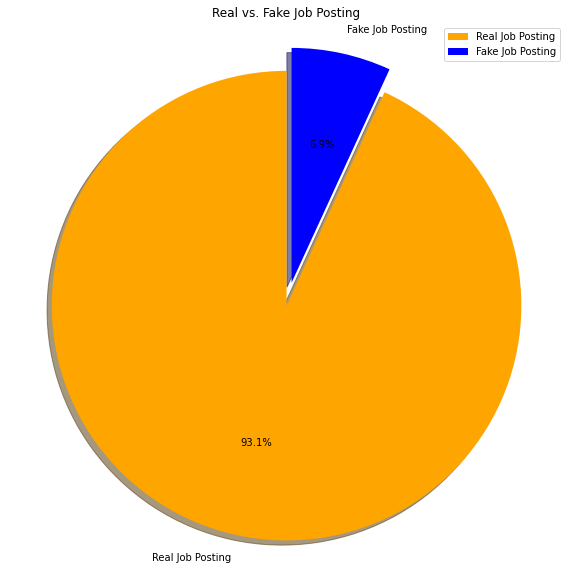

In [24]:
#Plotting out a PieChart to visually compare the Real/Fake jobs within US

real = job_us["fraudulent"].value_counts()[0]
fake = job_us["fraudulent"].value_counts()[1]

labels = 'Real Job Posting', 'Fake Job Posting' #creating the labels of each pie
sizes = [real, fake]


colors = ['orange', 'blue'] #differentiating the colors: Real = Orange, Fake = Blue

fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.pie(sizes, explode = (0,0.1), colors = colors, labels = labels, autopct="%1.1f%%", shadow=True, startangle = 90)
ax1.axis('equal')
plt.title('Real vs. Fake Job Posting')
plt.legend()
plt.show()

## Approximately, 93.1% of the jobs listed above are Real, whereas only 6.9% of the job listed above are Fake. This may not seem too much, however, it is necessary to see the fake job characteristics in order to detect these posts.

In [25]:
#This process is to see the overall "string values" each job contains to see how much textual information is provided.

text=job_us.select_dtypes(include="object") #Selecting data with data types of "object" 
text.drop(["location"],axis=1,inplace=True) #dropping "location" values as there are barely any null values (only 2%)

text_col=text.columns

In [26]:
text_col #columns that have been appended to "text"

Index(['title', 'department', 'salary_range', 'company_profile', 'description',
       'requirements', 'benefits', 'industry', 'Location'],
      dtype='object')

In [27]:
#replacing all the null values with an empty string
job_us[text_col] = job_us[text_col].replace(np.nan,"")

In [28]:
job_us["text"]= ""

In [29]:
for col in text.columns:
    job_us["text"] += " " + job_us[col] #in the newly made "text" column, append object values extracted above.

In [121]:
job_us["text"].iloc[0] #printing out the total infromation given in the first row(job) 

" Marketing Intern Marketing NA We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-

In [31]:
#creating a new column "text_len" representing the length of the text shown above
job_us["text_len"] = job_us["text"].str.len()

<AxesSubplot:xlabel='text_len', ylabel='Count'>

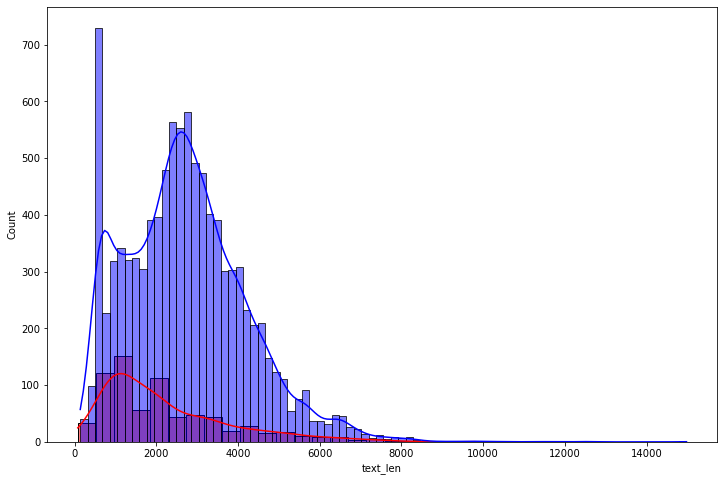

In [47]:
#creating a histoplot + density ditribution function 
sb.histplot(x = job_us[job_us["fraudulent"]==1]["text_len"],kde=True, color = "red")
sb.histplot(x = job_us[job_us["fraudulent"]==0]["text_len"],kde=True, color = "blue")

## The histogram above has been used to compare the overall information provided by the real/fake jobs within the dataset. The "blue" indicates REAL job values and the "red" indicates FAKE job values. 

## From the diagram above, we can conclude that the maximum count (mode) of the REAL jobs lies within the text_len of approximately 2500 word counts. However, fraudulent jobs have mode lying around 1600 word counts. This shows that the FAKE jobs have less information given to the candidates within the job posts.

In [50]:
#The newly added text_len column as well as columns that were originally "object" type has been converted
#into "int64" data type and therefore can be used as a numerical values for the Random Forest Classification
job_us.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type         int64
required_experience     int64
required_education      int64
industry               object
function                int64
fraudulent              int64
Location               object
text                   object
text_len                int64
dtype: object

# Univariate Decision Trees

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import recall_score

In [79]:
#define response string against other predictor variables
def classesdecision (dataframe, predictor, response, depth):
    
    # Recall the Dataset
    y = pd.DataFrame(dataframe[response])   # Response
    x = pd.DataFrame(dataframe[predictor])       # Predictor

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = depth)  # create the decision tree object
    dectree.fit(X_train, y_train)                    # train the decision tree model

    # Predict Criticism values corresponding to other Variables
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("predictor: \t", str(predictor))
    print("response: \t", str(response))
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()

    f, axes = plt.subplots(1,1,figsize=(12, 12))
    plot_tree(dectree, feature_names = X_train.columns, rounded = True, filled=True)
        
    plt.show()

predictor: 	 telecommuting
response: 	 fraudulent
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9333690843276579

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9271191742258367



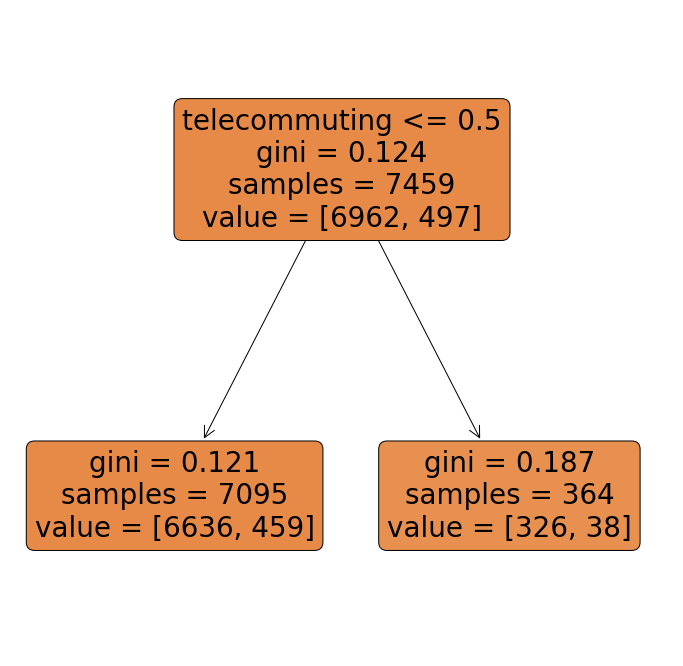

In [80]:
classesdecision(job_us, "telecommuting", "fraudulent",depth = 20)

### Out of the 7459 samples collected (70% of the total data values) 6936 samples are REAL whereas 523 samples are FAKE. 
### Samples that does not have telecommuting (telecommuting = 0) are in total 7091 samples out of which 6607 are considered REAL and 484 are considered FAKE. 6.8% (484/7091) of the jobs that does not have telecommuting are fraudulent.

### Samples that have telecommuting (telecommuting = 1) are in total 368 samples out of which 329 are considered REAL and 39 are considered Fraud. 10.6% (39/368) of the jobs that have telecommuting are fraudulent.

## From this we can conclude that, though it is a mere difference, fake jobs tend to have telecommuting.

predictor: 	 has_company_logo
response: 	 fraudulent
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9310899584394691

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9324366593681577



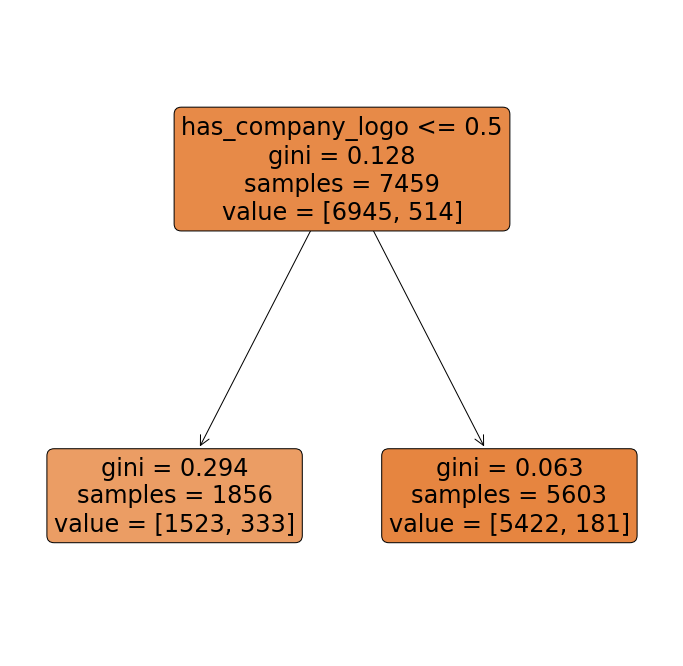

In [81]:
classesdecision(job_us, "has_company_logo", "fraudulent",depth = 20)

### Out of the 7459 samples collected (70% of the total data values) 6945 samples are REAL whereas 514 samples are FAKE. 
### Samples that does not have company logo (has_company_logo = 0) are in total 1856 samples out of which 1523 are considered REAL and 333 are considered FAKE. 17.9% (333/1856) of the jobs that does not have logo are fraudulent.

### Samples that does have company logo (has_company_logo = 1) are in total 5603 samples out of which 5422 are considered REAL and 181 are considered Fraud. 3.2% (181/5603) of the jobs that  have logo are fraudulent.

## From this we can conclude that  fake jobs tend to not have company logo.

predictor: 	 has_questions
response: 	 fraudulent
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9322965544979219

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9296215201751642



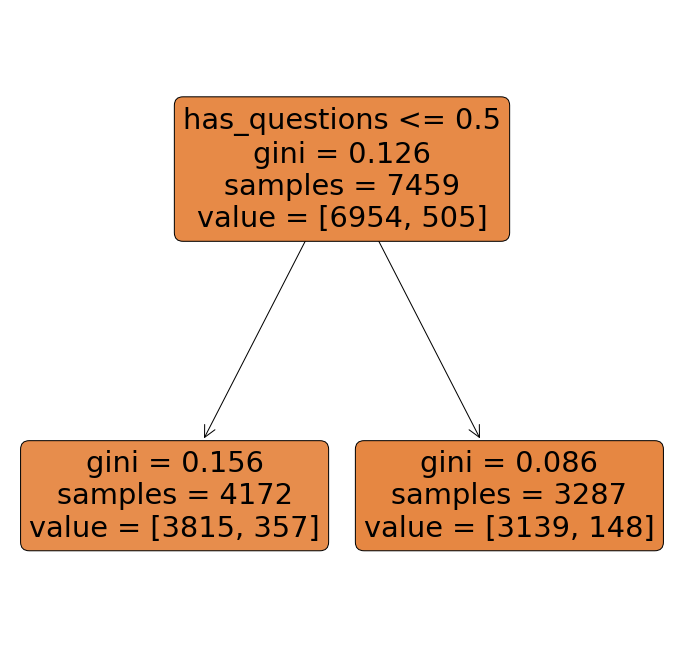

In [63]:
classesdecision(job_us, "has_questions", "fraudulent",depth = 20)

### Out of the 7459 samples collected (70% of the total data values) 6954 samples are REAL whereas 505 samples are FAKE. 
### Samples that does not have question (has_company_logo = 0) are in total 4172 samples out of which 3815 are considered REAL and 357 are considered FAKE. 8.6% (357/4172) of the jobs that does not have questions are fraudulent.

### Samples that does have company logo (has_company_logo = 1) are in total 3287 samples out of which 3139 are considered REAL and 148 are considered Fraud. 4.5% (148/3287) of the jobs that  have questions are fraudulent.

## From this we can conclude that, though it is a mere difference,  fake jobs tend to not have questions.

predictor: 	 employment_type
response: 	 fraudulent
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9302855610671672

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9343134188301533



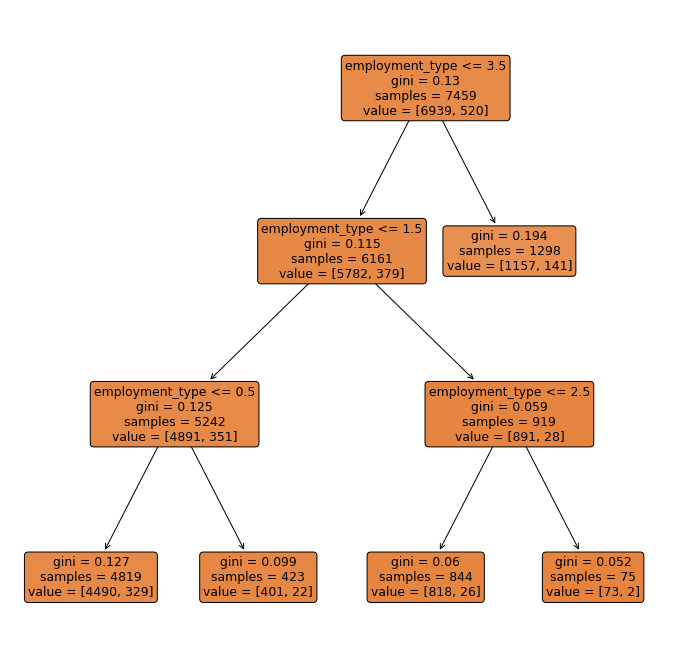

In [64]:
classesdecision(job_us, "employment_type", "fraudulent",depth = 20)

### Out of the 7459 samples collected (70% of the total data values) 6939 samples are REAL whereas 520 samples are FAKE. 

### (First Branch) Samples that are "Full-time = 0", "Part-time = 1", "Contract = 2", "Temporary = 3" are in total 6161 samples out of which 5782 are considered REAL and 379 are considered FAKE. 6.2% (357/4172) of the jobs that are within these set of jobs are fraudulent.

## (First Branch) Samples that are "Others" + "NA" = 4 are in total 1298 samples out of which 1157 are REAL and 141 are FAKE. 10.9% of the jobs (141/1157) within these criteria are considered fraud.

### (Second Branch) Samples that are "Full-time = 0", "Part- time = 1" are in total 5242 samples out of which 4891 are Real and 351 are fake. 6.7% (351/5242) of Full-time and Part-time jobs are fraud.

### (Second Branch) Samples that are "Contract = 2", "Temporary = 3" are in total 919 samples out of which 891 are Real and 28 are Fraud. 3% (28/919) of these job posts are fraud.

## (Third Branch) Sample that are Full-time are in total 4819 out of which 4490 are Real and 329 are Fake. 6.8% of these jobs are fraud.

## (Third Branch) Sample that are Part-time are in total 423 out of which 401 are Real and 22 are fake. 5.2% (22/423) of these jobs are fraud.

## (Third Branch) Sample that are in Contract are 844 out of which 818 are Real and 26 are fraud. 3.1% (26/844) of these jobs are fraud.

## (Third Branch) Sample that are Temporary are 75 out of which 73 are Real and 2 are fraud. 2.7% (2/75) of these jobs are fraud.

## From this we can conclude that, though it is a mere difference,  fake job posts tend to camouflage as full-time jobs.

predictor: 	 required_experience
response: 	 fraudulent
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.932162488269205

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9299343134188301



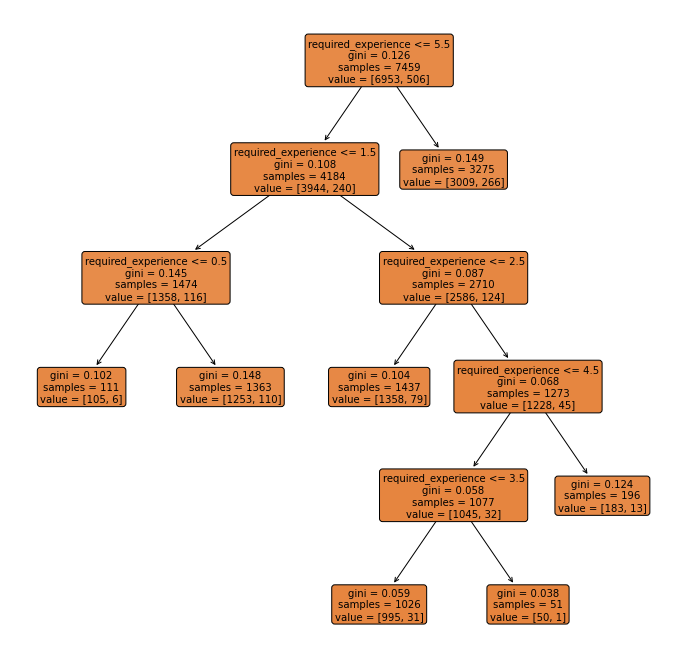

In [65]:
classesdecision(job_us, "required_experience", "fraudulent",depth = 20)

### Out of the 7459 samples collected (70% of the total data values) 6953 samples are REAL whereas 506 samples are FAKE. 

## (Second Branch) Jobs that does not require experience are in total 3275 out of which 3009 are Real and 266 are Fake jobs. 8.1% (266/3275) of these jobs are fraudulent.

## (Third Branch) Jobs that require Internship = 0 are in total 111 out of which 105 are Real and 6 are Fake. 5.4%(6/111) of these jobs are fraudulent.

## (Third Branch) Jobs that require Entry Level = 1 are in total 1363 out of which 1253 are Real and 110 are Fake. 8.1% (110/1363) of these jobs are fraudulent.

## (Third Branch) Jobs that require Mid-Senior Level = 2 are in total 1437 out of which 1358 are Real and 79 are Fraudulent. 5.5% (79/1437) of these jobs are fraudulent.

## (Fifth Branch) Jobs that require Associate level = 3 are in total 1026 out of which 995 are Real and 31 are Fake. 3% (31/1026) of these jobs are fraudulent.

## (Fifth Branch) Jobs that require Executive level = 4 are in total 51 out of which 50 are Real and 1 is Fake. 2% (1/51) of these jobs are fraudulent.

## (Fourth Branch) Jobs that require Director level = 5 are in total 196 out of which 183 are Real and 13 are Fake. 6.6% (13/196) of these jobs are fraudulent

## From this we can conclude that Entry Level seems to have highest rate of Fake job posts. 

predictor: 	 required_education
response: 	 fraudulent
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9284086338651294

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9386925242414764



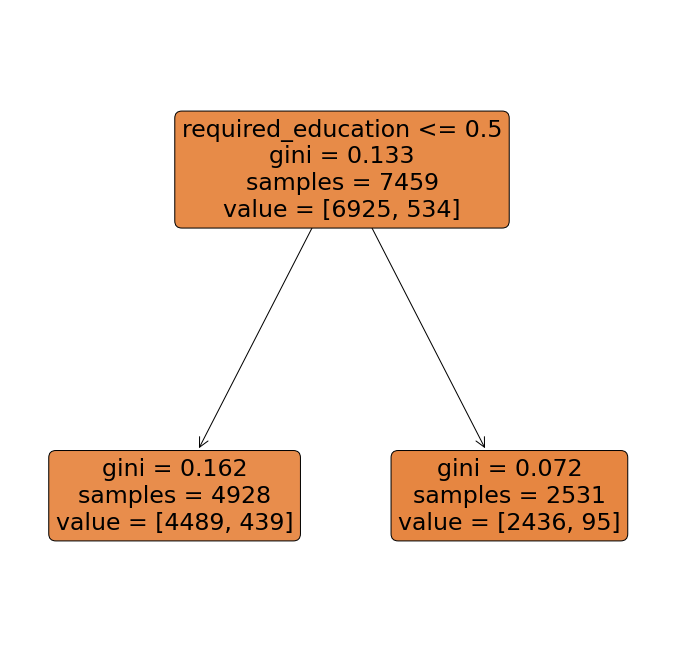

In [66]:
classesdecision(job_us, "required_education", "fraudulent",depth = 20)

### Out of the 7459 samples collected (70% of the total data values) 6925 samples are REAL whereas 534 samples are FAKE. 
### Samples that does not have Degree requirement (Required_education = 0) are in total 4928 samples out of which 4489 are considered REAL and 439 are considered FAKE. 8.9% (439/4928) of the jobs that does not have degree requirement are fraudulent.

### Samples that does have Degree requirement (Required_education = 1) are in total 2531 samples out of which 2436 are considered REAL and 95 are considered Fraud. 3.8% (95/2436) of the jobs that  have degree requirement are fraudulent.

## From this we can conclude that, though it is a mere difference,  fake jobs tend to not have degree requirements. (It may be targetting people without degree who already have hard time looking for some jobs)

predictor: 	 function
response: 	 fraudulent
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9314921571256201

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9314982796371598



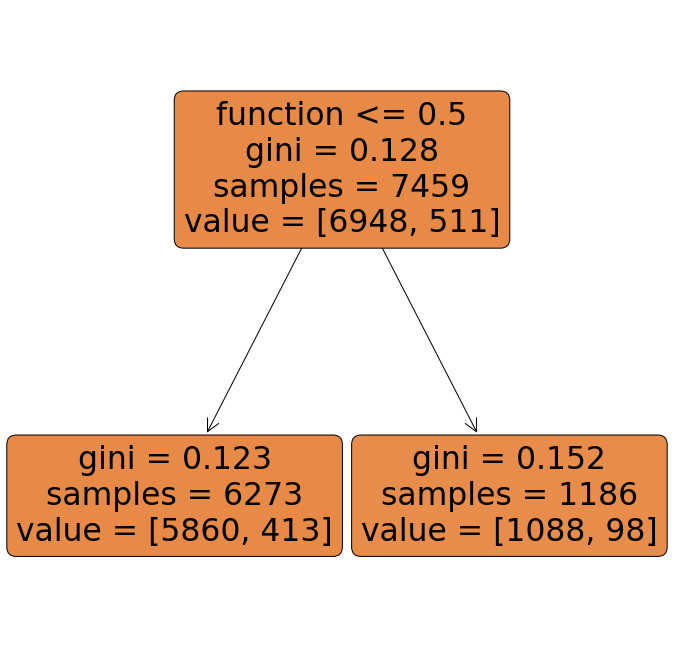

In [67]:
classesdecision(job_us, "function", "fraudulent",depth = 20)

### Out of the 7459 samples collected (70% of the total data values) 6948 samples are REAL whereas 511 samples are FAKE. 
### Samples that are not STEM related jobs (function = 0) are in total 6273 samples out of which 5860 are considered REAL and 413 are considered FAKE. 6.6% (413/6273) of the jobs that are not STEM related are fraudulent.

### Samples that are STEM related jobs (function = 1) are in total 1186 samples out of which 1088 are considered REAL and 98 are considered Fraud. 9% (98/1088) of the jobs that are STEM related are fraudulent.

## From this we can conclude that, though it is a mere difference,  fake jobs tend to be STEM related.

predictor: 	 text_len
response: 	 fraudulent
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9621933235018099

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.920863309352518



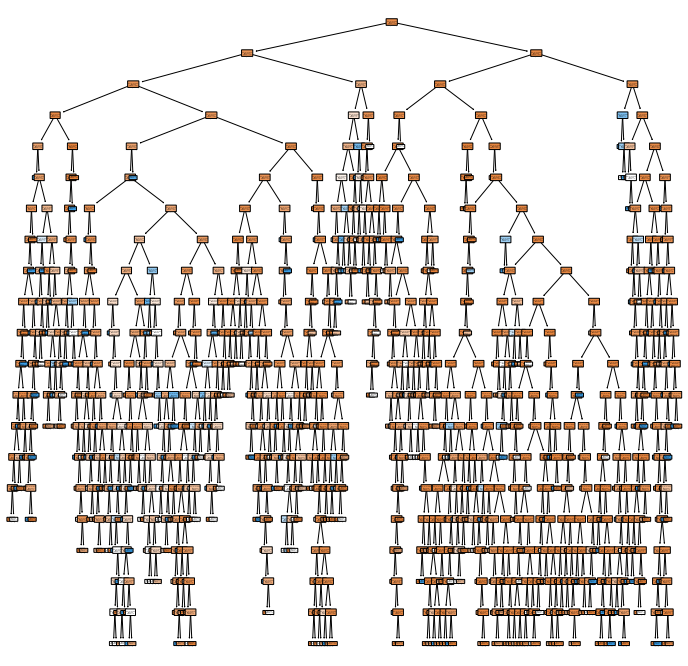

In [68]:
classesdecision(job_us, "text_len", "fraudulent",depth = 20)

# Comment on the Univariate Decision Trees:

### The depth of 20 for the decision tree is known to be the most accurate/optimal depth. Therefore the trees were initially set up with a maximum depth of 20. However, due to variance problem in the dataset, the depth would not stretch down. 
### The models shown above have approximately 92-93% accuracy and therefore showing a very high fitness for the model when applying the dataset. 
### The univariate decision tree alone shows the most important factors appearing within each predictor (column) values. It is a fast way to visualize the variance within the dataset, and as seen above, the dataset given does not contain too much variance and therefore decision trees can be effectively used. However, due to text_length column of the dataset where the decision tree is prone to overfitting (it has high variance and the tree is less biased than the other values), a Random Forest Model was needed to check. Also as the trees have a very little correlation among each other, a Random Forest Model could be used to analyz

# Random Forest Classifier

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import feature_selection
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [116]:
def ForClass(data, predictor, response, test_ratio, model = RandomForestClassifier()):
    print("Predictor:\t", predictor)
    print("Response:\t", response)
    X = pd.DataFrame(data[predictor])
    y = pd.DataFrame(data[response])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio)
    
    dectree = RandomForestClassifier(n_estimators=20, random_state = 42)  
    dectree.fit(X_train, y_train.values.ravel()) 
    y_pred = dectree.predict(X_test)
    
    from sklearn import metrics
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print()
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()

In [117]:
ForClass(job_us, ["telecommuting", "has_company_logo","has_questions","employment_type","required_experience","required_education", "function","text_len"], "fraudulent",0.3, model = RandomForestClassifier())

Predictor:	 ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'function', 'text_len']
Response:	 fraudulent
Mean Absolute Error: 0.06787613387550828
Mean Squared Error: 0.06787613387550828
Root Mean Squared Error: 0.2605304855012332

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9939670197077356

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9321238661244917



## The classification accuracy within the trained dataset is 99% which is higher compared to the decision trees shown above. Thus, indicating a more precise and accurate model for the dataset.

 1) text_len                       0.727603
 2) required_experience            0.071203
 3) has_company_logo               0.066174
 4) employment_type                0.053552
 5) function                       0.028439
 6) has_questions                  0.022771
 7) required_education             0.015844
 8) telecommuting                  0.014414


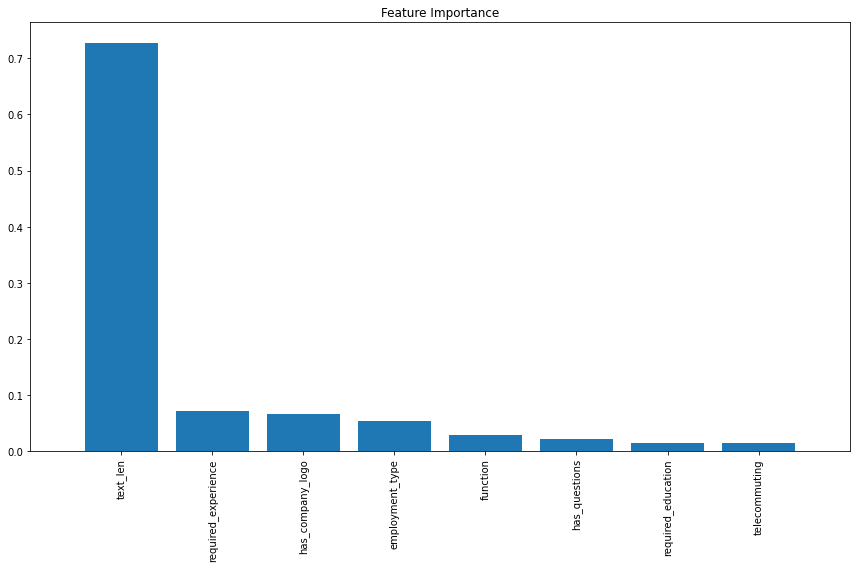

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x = job_us[["telecommuting", "has_company_logo","has_questions","employment_type","required_experience","required_education", "function","text_len"]]
y = job_us["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

from sklearn.ensemble import RandomForestClassifier

feat_labels = x.columns
forest = RandomForestClassifier(n_estimators=20,
                                random_state=42)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]


    
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

plt.show()



## Text_length (information provided by each job) came out to be the most important factor in deciding/detecting a fraudulent job in the data. However in contrast, other values are very small in importance compared to it and is almost neglectable. This maybe due to a great bias within the dataset as text_length is the only factor with high variance. Other values are very biased as variables within each column does not vary much.

 1) has_company_logo               0.302915
 2) required_experience            0.253103
 3) employment_type                0.166461
 4) function                       0.089547
 5) has_questions                  0.070208
 6) required_education             0.064742
 7) telecommuting                  0.053025


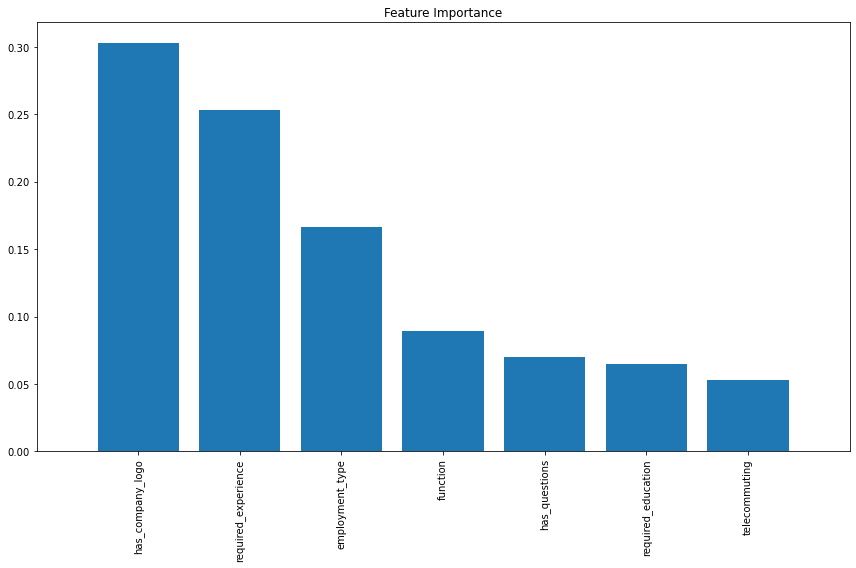

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x = job_us[["telecommuting", "has_company_logo","has_questions","employment_type","required_experience","required_education", "function"]]
y = job_us["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

from sklearn.ensemble import RandomForestClassifier

feat_labels = x.columns

forest = RandomForestClassifier(n_estimators=20,
                                random_state=42)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]


    
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()


plt.show()

## Removing the Text_length factor, it came out to be that the existence of company logo was the greatest factor in determining whether a job is fraudulent or not. In common sense, a company without having a logo reduces the credibility in seeing whether it is a real job or not. As logo is what becomes the face of the company and a clear representation, not having one indicates a high change of being a fraud.